In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme()

In [ ]:
valores = {"Atomic Number":np.arange(1,51),
           "State at 20°C":["Gas","Gas","Solid","Solid","Solid","Solid","Gas","Gas","Gas","Gas","Solid","Solid","Solid","Solid","Solid","Solid","Gas","Gas","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Liquid","Gas","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid","Solid"],
           "Melting point":[-259.16,np.NaN,180.50,1287,2077,3825,-210,-218.79,-219.67,-248.59,97.794,650,660.323,1414,44.15,115.21,-101.5,-189.34,63.5,842,1541,1670,1910,1907,1246,1538,1495,1455,1084.62,419.527,29.746,938.25,616,220.8,-7.2,-157.37,39.3,777,1522,1854,2477,2622,2157,2333,1963,1554.8,961.78,321.069,156.6,231.928],
           "Boiling point":[-252.87,-268.928,1342,2468,4000,3825,-195.75,-182.96,-188.11,-246.046,882.94,1090,2519,3265,280.5,444.61,-34.04,-185.848,759,1484,2836,3287,3407,2671,2061,2861,2927,2913,2560,907,2229,2833,616,685,58.8,-153.415,688,1377,3345,4406,4741,4639,4262,4147,3695,2963,2162,767,2027,2586],
           "Density":[.000082,.000164,.534,1.85,2.34,2.8565,.001145,.00138,.001553,.000825,.97,1.74,2.7,2.32,1.823,2.07,.0029,.00163,.89,1.54,2.99,4.506,6,7.15,7.3,7.87,8.86,8.9,8.96,7.134,5.91,5.32,5.75,4.8,3.1,.003425,1.53,2.64,4.47,6.52,8.57,10.2,11,12.1,12.4,12,10.5,8.69,7.31,7.287],
           "Relative Atomic Mass":[1.008,4.003,6.94,9.012,10.81,12.011,14.007,15.999,18.998,20.18,22.99,24.305,26.982,28.805,30.974,32.06,35.45,39.95,39.098,40.078,44.956,47.867,50.942,51.996,54.938,55.845,58.933,58.693,63.546,65.38,69.723,72.63,74.922,78.971,79.904,83.798,85.468,87.62,88.906,91.224,92.906,95.95,98,101.07,102.906,106.42,107.868,112.414,114.818,118.71],
           "Atomic Radius":[1.1,1.4,1.82,1.53,1.92,1.7,1.55,1.52,1.47,1.54,2.27,1.73,1.84,2.1,1.8,1.8,1.75,1.88,2.75,2.31,2.15,2.11,2.07,2.06,2.05,2.04,2,1.97,1.96,2.01,1.87,2.11,1.85,1.9,1.85,2.02,3.03,2.49,2.32,2.23,2.18,2.17,2.16,2.13,2.1,2.1,2.11,2.18,1.93,2.17],
           "Ionization Energies":[1312.05,2372.322,520.22,899.504,800.637,1086.454,1402.328,1313.942,1681.045,2080.662,495.845,737.75,577.539,786.518,1011.812,999.589,1251.186,1520.571,418.81,589.83,633.088,658,650.908,652.869,717.274,762.466,760.402,737.129,745.482,906.402,578.845,762.179,944.456,940.963,1139.859,1350.757,403.032,549.47,599.878,640.074,652.13,684.316,702.41,710.18,719.675,804.389,730.995,867.772,558.229,708.581],
           "Block":["s","s","s","s","p","p","p","p","p","p","s","s","p","p","p","p","p","p","s","s","d","d","d","d","d","d","d","d","d","d","p","p","p","p","p","p","s","s","d","d","d","d","d","d","d","d","d","d","p","p"]}

In [ ]:
df1 = pd.DataFrame(valores)

In [ ]:
df = pd.get_dummies(df1, drop_first=False)

In [ ]:
df.columns

Index(['Atomic Number', 'Melting point', 'Boiling point', 'Density',
       'Relative Atomic Mass', 'Atomic Radius', 'Ionization Energies',
       'State at 20°C_Gas', 'State at 20°C_Liquid', 'State at 20°C_Solid',
       'Block_d', 'Block_p', 'Block_s'],
      dtype='object')

<Figure size 360x288 with 0 Axes>

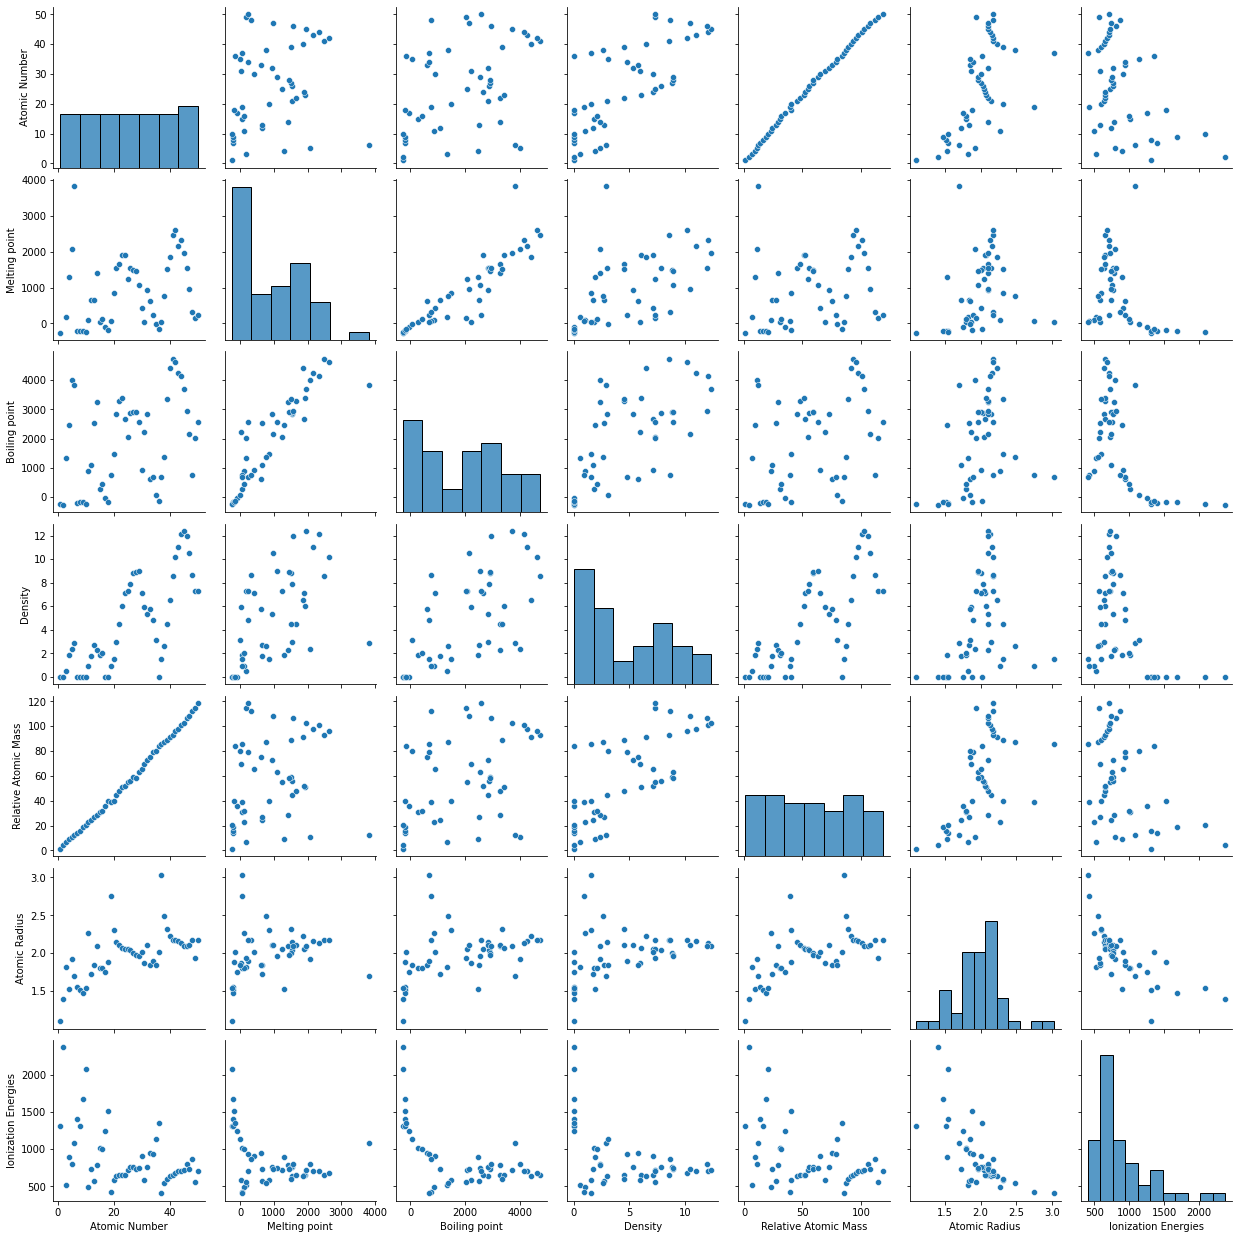

In [ ]:
plt.figure(figsize=(5,4))
sns.pairplot(data=df1)

We can see that the majority of parameters have very non-linear relations, It is somewhat expected given that bulk properties differ from the atomic properties of said element, luckily we see that the ionization energy follows more or less regular patterns, we should check that with the correlation heatmap

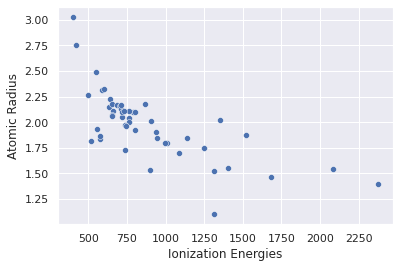

In [181]:
sns.scatterplot(x="Ionization Energies", y="Atomic Radius",data=df1)

Seems like an $E\approx \frac{1}{r}$ graph

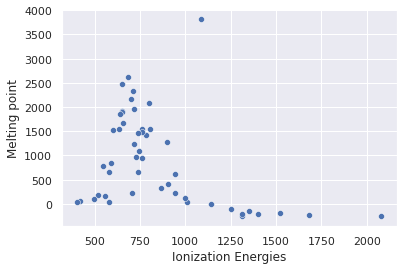

In [184]:
sns.scatterplot(x="Ionization Energies", y="Melting point",data=df1)

This graph has as well an envelope of $\frac{1}{r}$

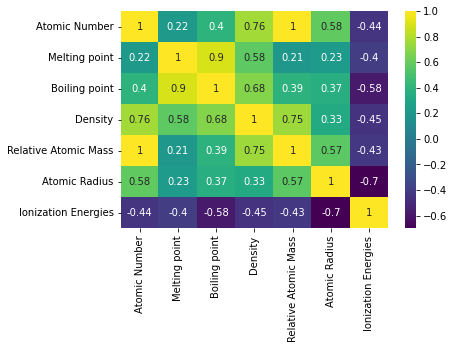

In [ ]:
sns.heatmap(df1.corr(),cmap="viridis",annot=True)

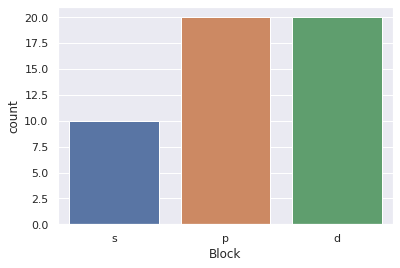

In [168]:
sns.countplot(x="Block",data=df1)

The assumptions were correct, bulk properties like Boiling point or Melting are not heavily correlated except with each other and the ionization energies.
We see that atomic radius and boiling point temperature are the related to the ionization energy

The proportion is not symmetric, so we have to stratify our data according to the "Block" label

In [ ]:
X = df.drop("Ionization Energies",axis=1).values
y = df["Ionization Energies"].values

In [ ]:
X

,Atomic Number,Melting point,Boiling point,Density,Relative Atomic Mass,Atomic Radius,State at 20°C_Gas,State at 20°C_Liquid,State at 20°C_Solid,Block_d,Block_p,Block_s
0,1,-259.160,-252.870,0.000082,1.008,1.10,1,0,0,0,0,1
1,2,NaN,-268.928,0.000164,4.003,1.40,1,0,0,0,0,1
2,3,180.500,1342.000,0.534000,6.940,1.82,0,0,1,0,0,1
3,4,1287.000,2468.000,1.850000,9.012,1.53,0,0,1,0,0,1
4,5,2077.000,4000.000,2.340000,10.810,1.92,0,0,1,0,1,0
5,6,3825.000,3825.000,2.856500,12.011,1.70,0,0,1,0,1,0
6,7,-210.000,-195.750,0.001145,14.007,1.55,1,0,0,0,1,0
7,8,-218.790,-182.960,0.001380,15.999,1.52,1,0,0,0,1,0
8,9,-219.670,-188.110,0.001553,18.998,1.47,1,0,0,0,1,0
9,10,-248.590,-246.046,0.000825,20.180,1.54,1,0,0,0,1,0


In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error

In [170]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,stratify=df1["Block"])

In [171]:
pip = Pipeline([("imputer",SimpleImputer()),("scaler",StandardScaler()),("linear",LinearRegression())])

In [172]:
pip.fit(X_train, y_train)

Pipeline(steps=[('imputer', SimpleImputer()), ('scaler', StandardScaler()),
                ('linear', LinearRegression())])

In [173]:
pip.score(X_test, y_test,)

0.8049313135703868

In [174]:
y_pred = pip.predict(X_test)

In [176]:
mean_squared_error(y_test, y_pred, squared=False)

207.26744780008693

The rmse is 193 KJ/mol which is not bad but is not that exact, maybe a neural network could make a better model

In [177]:
lr = pip["linear"]

In [178]:
lr.coef_

array([-264.63340017,  275.7103028 , -294.72812197,   33.57101485,
        298.97247679,  -77.02956859,  118.64090597,  -16.51182044,
       -104.70740596,  -23.24691545,   32.30371593,  -11.09226993])

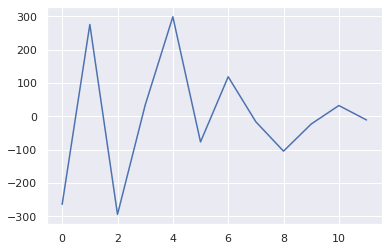

In [179]:
plt.plot(range(0,len(lr.coef_)),lr.coef_)

In [ ]:
df.columns

Index(['Atomic Number', 'Melting point', 'Boiling point', 'Density',
       'Relative Atomic Mass', 'Atomic Radius', 'Ionization Energies',
       'State at 20°C_Gas', 'State at 20°C_Liquid', 'State at 20°C_Solid',
       'Block_d', 'Block_p', 'Block_s'],
      dtype='object')

In [ ]:
#The greatest parameters that are correlated to the ionization energy are, atomic number and relative atomic mass which themselves
#are very correlated, and its not surprising at all, because the relevant quantity in the respective schrodinger equation is the nucles-electron force, which depends on Z,
#the melting point and the boiling are somewhat correlated, one possible explanation is that as the melting point is higher, 
#the bonds between the atoms of the element are stronger, and because they are molecules of only one element
#the respective strength of the bonds are directly related to the stiffness of the electron to the nucleus, therefore, to the 
#ionization energy.
#As expected, the energy is inversely proportional to the atom radius, because for smaller r, the coulombic potential grows higher
#If is a gas at 20°c the linear regression coefficient is positive, the reason is simple, the gases have fewer strength in their bonds
#so their binding energies are lower as their solid counterparts